# Assignment 2: Linear Models and Validation Metrics (40 marks total)
### Due: February 13 at 11:59pm

### Name: 

### In this assignment, you will need to write code that uses linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

## Part 1: Classification (20 marks)

You have been asked to develop code that can help the user determine if the email they have received is spam or not. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 0: Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick

### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/spam.html

Use the yellowbrick function `load_spam()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [18]:
# TO DO: Import spam dataset from yellowbrick library (0.5 marks)
from yellowbrick import datasets
X, y= datasets.load_spam()
print(X.shape)
# print(X.describe)


print(y.shape)
# print(y.describe)


# TO DO: Print size and type of X and y (0.5 marks)
print(X.size)
print(type(X))

print(y.size)
print(type(y))

(4600, 57)
(4600,)
262200
<class 'pandas.core.frame.DataFrame'>
4600
<class 'pandas.core.series.Series'>


### Step 2: Data Processing (2 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [4]:
# TO DO: Check if there are any missing values and fill them in if necessary (1 mark)
X_df = pd.DataFrame(X)

missing_values = X_df.isnull().sum().sum()

if missing_values > 0:
    print("There are missing values in the dataset.")
    X_df.fillna(X_df.mean(), inplace=True)
    print("Missing values have been filled in with the mean of each column.")
else:
    print("There are no missing values in the dataset.")
    
X_filled = X_df.to_numpy()

There are no missing values in the dataset.


For this task, we want to test if the linear model would still work if we used less data. Use the `train_test_split` function from sklearn to create a new feature matrix named `X_small` and a new target vector named `y_small` that contain **3%** of the data.

In [19]:
# TO DO: Create X_small and y_small (1 mark)
from sklearn.model_selection import train_test_split
X_small, X_test_small, y_small, y_test_small = train_test_split(X, y, test_size=0.97, random_state=0)

### Step 3: Implement Machine Learning Model

1. Import `LogisticRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`
3. Implement the machine learning model with three different datasets: 
    - `X` and `y`
    - Only first two columns of `X` and `y`
    - `X_small` and `y_small`
    
    

In [9]:
from sklearn.linear_model import LogisticRegression

model_ = LogisticRegression(max_iter=2000)

X_large, X_test_large, y_large, y_test_large = train_test_split(X, y, random_state=0)

model_1 = LogisticRegression(max_iter=2000)
lr_1 = model_1.fit(X_large, y_large)
linear_predictions_1= model_1.predict(X_test_large)

X.iloc[:, :2]

X_two_columns, X_test_two_columns, y_two_columns, y_test_two_columns = train_test_split(X.iloc[:, :2], y, random_state=0)

model_2 = LogisticRegression(max_iter=2000)

lr_2 = model_2.fit(X_two_columns, y_two_columns)

linear_predictions_2 = lr_2.predict(X_test_two_columns)

model_3 = LogisticRegression(max_iter=2000)

lr_3 = model_3.fit(X_small, y_small)

linear_predictions_3 = lr_3.predict(X_test_small)

### Step 4: Validate Model 

Calculate the training and validation accuracy for the three different tests implemented in Step 3

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

linear_mae_1 = mean_absolute_error(y_test_large, linear_predictions_1)
linear_rmae_1 = np.sqrt(mean_squared_error(y_test_large, linear_predictions_1))

print(f"Mean Absolute Error {linear_mae_1}")
print(f"Root Mean Squared Error {linear_rmae_1}")


print("lr.coef_: ", lr_1.coef_)
print("lr.intercept_: ", lr_1.intercept_)
print("Training score: {:.2f}".format(lr_1.score(X_large, y_large)))
print("Validation score: {:.2f}".format(lr_1.score(X_test_large, y_test_large)))

linear_mae_2 = mean_absolute_error(y_test_two_columns, linear_predictions_2)
linear_rmae_2 = np.sqrt(mean_squared_error(y_test_two_columns, linear_predictions_2))

print(f"Mean Absolute Error {linear_mae_2}")
print(f"Root Mean Squared Error {linear_rmae_2}")


print("lr.coef_: ", lr_2.coef_)
print("lr.intercept_: ", lr_2.intercept_)
print("Training score: {:.2f}".format(lr_2.score(X_two_columns, y_two_columns)))
print("Validation score: {:.2f}".format(lr_2.score(X_test_two_columns, y_test_two_columns)))

linear_mae_3 = mean_absolute_error(y_test_small, linear_predictions_3)
linear_rmae_3 = np.sqrt(mean_squared_error(y_test_small, linear_predictions_3))

print(f"Mean Absolute Error {linear_mae_3}")
print(f"Root Mean Squared Error {linear_rmae_3}")


print("lr.coef_: ", lr_3.coef_)
print("lr.intercept_: ", lr_3.intercept_)
print("Training score: {:.2f}".format(lr_3.score(X_small, y_small)))
print("Validation score: {:.2f}".format(lr_3.score(X_test_small, y_test_small)))


Mean Absolute Error 0.06347826086956522
Root Mean Squared Error 0.25194892512087685
lr.coef_:  [[-3.99027207e-01 -1.66259221e-01  1.80214509e-01  8.91037669e-01
   5.21120557e-01  8.47230753e-01  2.07389855e+00  5.43664685e-01
   6.27075336e-01  5.90975642e-02 -4.56208900e-01 -1.98460230e-01
   2.12381454e-01  6.77814050e-02  1.18647298e+00  1.19364455e+00
   8.82434406e-01  1.35738156e-01  9.22873249e-02  9.03090465e-01
   1.86976645e-01  1.09563683e-01  1.90282898e+00  3.24074673e-01
  -1.55578275e+00 -9.29173480e-01 -3.22296490e+00  4.36414953e-01
  -1.32345459e+00 -1.44508831e-01 -1.65708398e+00  4.96367756e-02
  -8.56592880e-01  1.50716025e-01 -1.55450032e+00  7.84611239e-01
  -2.82371247e-02  1.15541179e-01 -7.20963766e-01 -7.74327360e-01
  -1.40201448e+00 -1.86164327e+00 -6.24932032e-01 -1.22850741e+00
  -7.26707778e-01 -1.54574475e+00 -6.25809559e-01 -1.61538709e+00
  -9.79292092e-01 -1.37507177e-02 -6.53039423e-01  2.53233841e-01
   3.14981873e+00  1.10079194e+00  2.23270356e-

### Step 5.1: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Data size, training accuracy, validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [15]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
import pandas as pd

training_score_1 = lr_1.score(X_large, y_large)
validation_score_1 = lr_1.score(X_test_large, y_test_large)
results = pd.DataFrame(columns=["Data size", "Training Accuracy", "Validation Accuracy"])

results.loc[len(results)]= {"Data size": len(X_large), "Training Accuracy": training_score_1, "Validation Accuracy": validation_score_1}

training_score_2 = lr_2.score(X_two_columns, y_two_columns)
validation_score_2 = lr_2.score(X_test_two_columns, y_test_two_columns)
results.loc[len(results)] = {"Data size": len(X_two_columns), "Training Accuracy": training_score_2, "Validation Accuracy": validation_score_2}

training_score_3 = lr_3.score(X_small, y_small)
validation_score_3 = lr_3.score(X_test_small, y_test_small)
results.loc[len(results)] = {"Data size": len(X_small), "Training Accuracy": training_score_3, "Validation Accuracy": validation_score_3}

print(results)

   Data size  Training Accuracy  Validation Accuracy
0       3450           0.928696             0.936522
1       3450           0.608406             0.613043
2        138           0.963768             0.906992


### Step 5.2: Visualize Classification Errors (3 marks)

In this section, print the confusion matrix and the classification report to investigate the number of false positives vs. false negatives. Use the full dataset for this analysis

In [16]:
# TO DO: Retrieve target vector and predicted values for validation set using full dataset  
from sklearn.metrics import confusion_matrix

# Create confusion matrices for the RF model
cm_rf = confusion_matrix(y_test_large, linear_predictions_1)

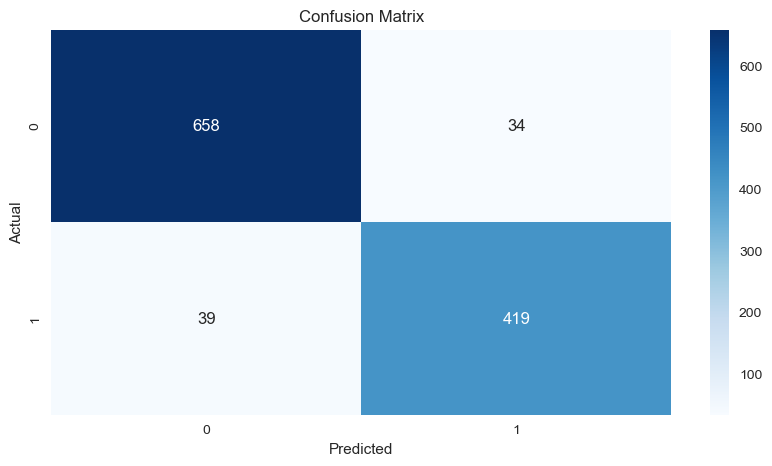

In [17]:
# TO DO: Print confusion matrix using a heatmap
# HINT: To remove scientific notation from a heatmap, set the parameter fmt='d'
# Set up the figure size using subplots
fig, axes = plt.subplots(figsize = (10,5))
# Create a heatmap for Random Forest
sns.heatmap(cm_rf, annot=True, fmt = 'd', cmap='Blues', ax=axes)
axes.set_title("Confusion Matrix")
axes.set_xlabel("Predicted")
axes.set_ylabel("Actual")

plt.show()

In [19]:
# TO DO: Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_large, linear_predictions_1,
                           zero_division=0))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       692
           1       0.92      0.91      0.92       458

    accuracy                           0.94      1150
   macro avg       0.93      0.93      0.93      1150
weighted avg       0.94      0.94      0.94      1150



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the amount of data used? Explain with values.
1. In this case, what do a false positive and a false negative represent? Which one is worse?
1. Based on your answer to question 2, would you want to maximize precision or recall? How would you do this?

*ANSWER HERE*

1. 
- training set with full dataset
The training score is 0.93, and the validation score is 0.94. This means the model performs well on both the training and unseen data, means a good model and generalizes well.
- training with first two columns:
Both the training and testing scores are recorded at 0.61, indicating a lack of performance variance. This constraint limits the model's ability to capture the full complexity of the data. The model exhibits high bias and low variance, suggestive of underfitting. In simpler terms, it's too basic and fails to grasp the underlying data patterns effectively.
- training set with small data size:
When utilizing a smaller testing set, the training score elevates to 0.96, suggesting improved fitting to the training data. However, the validation score drops to 0.91 compared to utilizing the full dataset. While the high training score implies better fitting with less validation data, the slight decline in the validation score suggests a potential for overfitting due to insufficient data for validation of predictions.

2.
False positive means model predicts 1, but actual value is 0. false negative means model predicts 0, but actual is 1. In my opinion false negative is worse. Because if the model fails to predict a spam. the spam content will be actually released. false positive will not let spam be released even the model censors non-spam contents.

3. 
I would like to maximize recall because we want to have more positive results. Recall is the ratio of true positive predictions to true positives and false negatives. To do it, I could adjust the model's threshold to be more lenient in classifying positives, ensuring fewer false negatives.


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE - BE SPECIFIC*

1. Lab code and lectures.

2. Tried to fromualate the solutions on my own but use generative AI for syntax and other questions.

3. I used Ai for syntax and other sort of easy access information

4. I had challenges classifying recall and precision so I asked AI to generate some study material for me.

## Part 2: Regression (15 marks)

For this section, we will be evaluating concrete compressive strength of different concrete samples, based on age and ingredients. You will need to repeat the steps from Part 1 for this analysis.

### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [22]:
# TO DO: Import concrete dataset from yellowbrick library (0.5 marks)
from yellowbrick import datasets
X, y= datasets.load_concrete()
# TO DO: Print size and type of X and y (0.5 marks)
print(X.shape)
print(X.describe)

print(y.shape)
print(y.describe)
# TO DO: Print size and type of X and y (0.5 marks)
print("***************************")

print(X.size)
print(type(X))

print(y.size)
print(type(y))

(1030, 8)
<bound method NDFrame.describe of       cement   slag    ash  water  splast  coarse   fine  age
0      540.0    0.0    0.0  162.0     2.5  1040.0  676.0   28
1      540.0    0.0    0.0  162.0     2.5  1055.0  676.0   28
2      332.5  142.5    0.0  228.0     0.0   932.0  594.0  270
3      332.5  142.5    0.0  228.0     0.0   932.0  594.0  365
4      198.6  132.4    0.0  192.0     0.0   978.4  825.5  360
...      ...    ...    ...    ...     ...     ...    ...  ...
1025   276.4  116.0   90.3  179.6     8.9   870.1  768.3   28
1026   322.2    0.0  115.6  196.0    10.4   817.9  813.4   28
1027   148.5  139.4  108.6  192.7     6.1   892.4  780.0   28
1028   159.1  186.7    0.0  175.6    11.3   989.6  788.9   28
1029   260.9  100.5   78.3  200.6     8.6   864.5  761.5   28

[1030 rows x 8 columns]>
(1030,)
<bound method NDFrame.describe of 0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794


### Step 2: Data Processing (1 mark)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [23]:
# TO DO: Check if there are any missing values and fill them in if necessary
print(X.isnull().sum())

print(y.isnull().sum())

cement    0
slag      0
ash       0
water     0
splast    0
coarse    0
fine      0
age       0
dtype: int64
0


### Step 3: Implement Machine Learning Model (2 marks)

1. Import `LinearRegression` from sklearn
2. Instantiate model `LinearRegression()`
3. Implement the machine learning model with `X` and `y`

In [24]:
# TO DO: ADD YOUR CODE HERE
# Note: for any random state parameters, you can use random_state = 0
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
lr_2 = model.fit(X_train, y_train)
linear_predictions_2 = lr_2.predict(X_test)

### Step 4: Validate Model (2 marks)

Calculate the training and validation accuracy using mean squared error and R2 score.

In [25]:
# TO DO: ADD YOUR CODE HERE

linear_mae_2 = mean_absolute_error(y_test, linear_predictions_2)
linear_rmae_2 = np.sqrt(mean_squared_error(y_test, linear_predictions_2))

print(f"Mean Absolute Error {linear_mae_2}")
print(f"Root Mean Squared Error {linear_rmae_2}")

print("Training score: {:.2f}".format(lr_2.score(X_train, y_train)))
print("Validation score: {:.2f}".format(lr_2.score(X_test, y_test)))

Mean Absolute Error 7.865298605808212
Root Mean Squared Error 9.779332023553774
Training score: 0.61
Validation score: 0.64


### Step 5: Visualize Results (1 mark)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: MSE and R2 score
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [26]:
# TO DO: ADD YOUR CODE HERE
data = {
    'Training accuracy': [lr_2.score(X_train, y_train)],
    'Validation accuracy': [lr_2.score(X_test, y_test)],
    'MSE': [linear_mae_2],
    'R2': [linear_rmae_2]
}

results = pd.DataFrame(data)

print(results)

   Training accuracy  Validation accuracy       MSE        R2
0           0.609071             0.636898  7.865299  9.779332


### Questions (4 marks)
1. Did using a linear model produce good results for this dataset? Why or why not?
1. Could we tell if this model was a good fit by using just the mean squared error? Why or why not?

*ANSWER HERE*

1. Results are off by a substantial amount as demosntarted by the MSE and R squared value. This is probably due to noise in the dataset
2. We cannot, MSE does not indicate how much of the variance in the target variable the model accounts for. MSE is highly sensitive to outliers because it squares the errors. 

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

1. Using the answers based on part 1, which was sourced from the labs and lectures.
2. I tried to come up with hollistic solutions on my own, and for the most part I did, however where some sort of suplementary information was needed I resorted to google or gen AI. One such example was regarding the evalutaion of the various models and how the size of the sample had an impact on the metrics.
3. I directed targeted questions to the AI (how do you check for a null etc). And, I utilized the AI's capabilities to deepen my comprehension of various concepts. Since I didn't input any code, I refrained from making modifications to it. This time, my approach involved independent problem-solving.
4. I had challenges with linear regression model, I wasnt sure how the MSE and R squared value correlated with my findings however a little bit of research clarified it.

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

- low training score & low validation score (0.61 & 0.62) means underfitting and low variance. Need more data and more variance. 

- validation score goes down probably indicates a potential of overfitting and need more test data to validate score.

- maximizing precision means reducing false negative

- maximizing recall means reducing false positive

- To get higher precision rate, one strategy is to train model to treat positive data leniently, to make more data positive.

- sometimes noises & outliers in the dataset could significantly impact MSE. Cannot evaluate a model only based on MSE. A model could have a high MSE if it fails to predict outliers accurately, even if it performs well for the majority of the data.

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*


In completing the machine learning assignment, I encountered various challenges that pushed me to explore new methodologies and problem-solving strategies. I found the process of exploring ML concepts and breaking them down into understandable explanations particularly motivating and interesting Despite the difficulties, the experience enhanced my understanding of the subject matter and honed my analytical skills.